# Simple Linear Regression

## Understanding data

In [1]:
#import data using Pandas

import pandas as pd

In [2]:
advertising = pd.read_csv("tvmarketing.csv")

In [3]:
#First 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
# Last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
#check column info of dataframe
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
#Check shape of dataframe
advertising.shape

(200, 2)

In [7]:
# Check some statistical information about dataframe
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## Visualising Data using Seaborn

In [8]:
import seaborn as sns

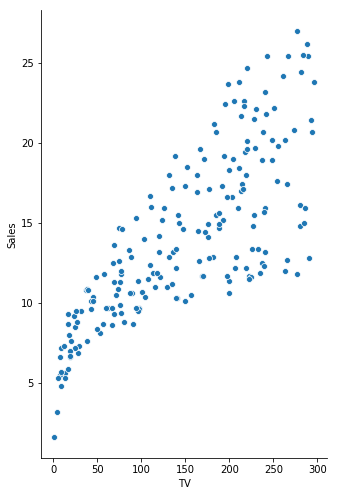

In [9]:
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales', height=7, aspect=0.7, kind="scatter")

Equation of linear regression:

y = c + m_1x_1 + m_2x_2 + ... + m_nx_n

y is the response

c is the intercept

m_1 is the coefficient for the first feature

m_n is the coefficient for the nth feature  

y = c + m_1*TV

The m values are called the model **coefficients** or **model parameters**.


### Generic Steps in model building using ```sklearn``` (sci-kit) library

### Preparing X & y

-  The scikit-learn library expects X (```feature``` variable) and y (```response``` variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy

In [10]:
# Preparing feature variable X
X = advertising["TV"]
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [11]:
# Preparing Response variable y . Line equation is: y = mx + c
y = advertising["Sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Splitting Data into Train and Test Data set

In [12]:
from sklearn.model_selection import train_test_split

#random_state is seed for random number generator
#data is split into 70:30 ratio for train:test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [13]:
print("type(X_train)::",type(X_train))
print("type(y_train)::",type(y_train))
print("type(X_test)::",type(X_test))
print("type(y_test)::",type(y_test))

type(X_train):: <class 'pandas.core.series.Series'>
type(y_train):: <class 'pandas.core.series.Series'>
type(X_test):: <class 'pandas.core.series.Series'>
type(y_test):: <class 'pandas.core.series.Series'>


In [14]:
print("X_train.shape::", X_train.shape)
print("y_train.shape::", y_train.shape)
print("X_test.shape::", X_test.shape)
print("y_test.shape::", y_test.shape)

X_train.shape:: (140,)
y_train.shape:: (140,)
X_test.shape:: (60,)
y_test.shape:: (60,)


In [17]:
# It is general observation in scikit-learn that observations are rows while features are columns.
# this is needed only in case of single feature , in this case 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]


Simply put, the newaxis is used to increase the dimension of the existing array by one more dimension, when used once. Thus,

- 1D array will become 2D array

- 2D array will become 3D array

- 3D array will become 4D array

- 4D array will become 5D array

What is np.newaxis?
The np.newaxis is just an alias for the Python constant None, which means that wherever you use np.newaxis you could also use None.
X_train = X_train[:, None]

In [18]:
print("X_train.shape::", X_train.shape)
print("y_train.shape::", y_train.shape)
print("X_test.shape::", X_test.shape)
print("y_test.shape::", y_test.shape)

X_train.shape:: (140, 1)
y_train.shape:: (140,)
X_test.shape:: (60, 1)
y_test.shape:: (60,)


### Perform Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Fit model using lr.fit
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Coefficients Calculation

In [22]:
print("lr.intercept_ i.e. c :", lr.intercept_)
print("lr.coef_ i.e. m ::", lr.coef_)

lr.intercept_ i.e. c : 6.989665857411679
lr.coef_ i.e. m :: [0.04649736]


y = mx + c

Sales = 6.90 + 0.0465 + TV

### Predictions

In [26]:
# Make predictions on testing set
y_pred = lr.predict(X_test)

print("type(y_pred)::", type(y_pred))

# now we have 2 valuesets for y, predicted values from test data : y_pred
# and actual values of test data : y_test

type(y_pred):: <class 'numpy.ndarray'>


### Computing RMSE and R^2 Values

Text(0, 0.5, 'Sales')

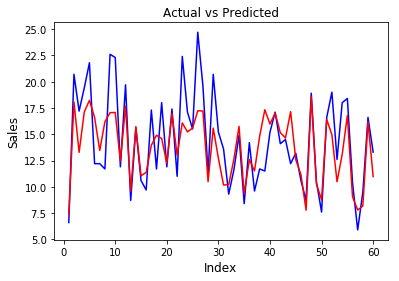

In [34]:
import matplotlib.pyplot as plt

c = [i for i in range(1,61,1)]   #Generate index for x-axis

fig = plt.figure()
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color="red")

plt.title("Actual vs Predicted")
plt.xlabel("Index", fontsize=12)
plt.ylabel("Sales", fontsize=12)

Text(0, 0.5, 'y_test - y_pred')

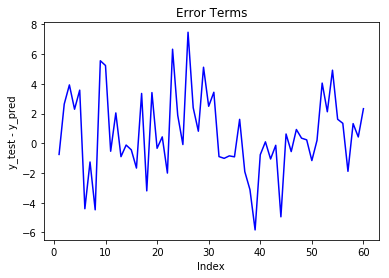

In [36]:
# Error Terms
c = [i for i in range(1,61,1)]   #Generate index for x-axis

fig = plt.figure()
plt.plot(c, y_test-y_pred, color="blue")
plt.title("Error Terms")
plt.xlabel("Index")
plt.ylabel("y_test - y_pred")

# this plot is centered around 0 value. and plots difference between actual and predicted y value.
# if point is near to 0, prediction is almost equal. For spikes, significant difference between actual and predicted value.

In [40]:
# Calculating Mean Squared Error and Coefficient of Determination(R^2)
from sklearn.metrics import mean_squared_error, r2_score

mse= mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test , y_pred)

print("Mean Squared Error::", mse)
print("r_square_value::", r_square)

Mean Squared Error:: 7.97579853285485
r_square_value:: 0.5942987267783302


Mean Squared Error is 7.98. It means model is not able to match 7.98 % values only.

Text(0, 0.5, 'Predicted Sale')

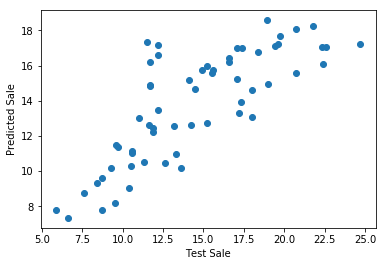

In [44]:
#PLotting Test vs Predicated values of y

plt.scatter(y_test, y_pred)
plt.xlabel("Test Sale")
plt.ylabel("Predicted Sale")
